### SIMPSONS CHARACTER RECOGNITION
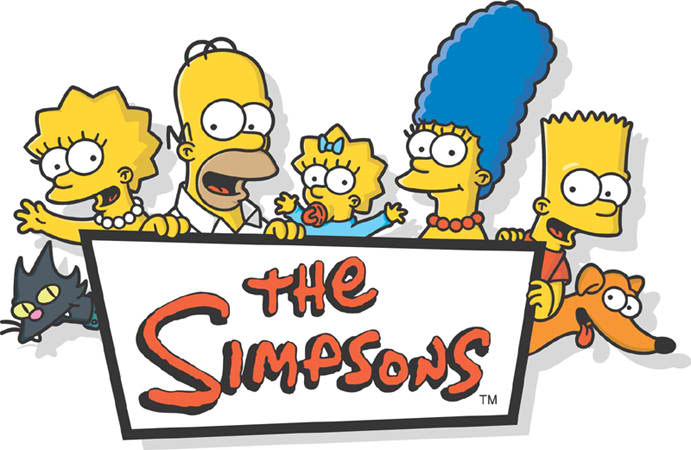

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator  
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPool2D
import os
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [4]:
num_of_class_for_classification = 20 # classification classes of characters
img_rows,img_cols = 50,50
batch_size = 512
# batch_size - how many image you want to give at a time to train your model according to your RAM size you can give as much images image you give tmodel will give better results.
# why we give the less pixel size- We decrease the image size that model works faster and it able to recognize the in less pixels.
# If our accuracy is not increasing then we can tweak with the pixel size.

In [5]:
train_dir_location = r'C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsons_dataset\train'
val_dir_location   = r'C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsons_dataset\validation'

In [6]:
# Converting the images into arrays using preprocessing lib and using method ImageDataGenerator 
# image is a bunch of pixels 0-255

# function for image preprocessing for tranning images
train_data_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest'
)


# function for image preprocessing for validation images
validation_data_generator = ImageDataGenerator(rescale=1./255)

# Now calling the train_data_generator and passing the images for pre processing train_data_generator and validation_data_generator

train_generator = train_data_generator.flow_from_directory(
    train_dir_location,
    target_size = (img_rows,img_cols),
    batch_size  = batch_size,
    class_mode  = 'categorical'
)


val_generator = validation_data_generator.flow_from_directory(
    val_dir_location,
    target_size = (img_rows,img_cols),
    batch_size  = batch_size,
    class_mode  = 'categorical'

)

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


### 👉 Imagenet is a competition many people participate with CNN architecture, 
### 👉 Competetior train there architecture with thousand of clasess to there model that wins the competition.
### 👉 So VGG16 architecture gave the max accuracy and wons in the 2014 imagenet competition. 
### 👉Creating VGG16 model architecture
### 👉Why it is called  VGG16-  it consists of 16 Convolutional layers.
### 👉Advantages
1. Easy to understands.
2. Easy for beginners.
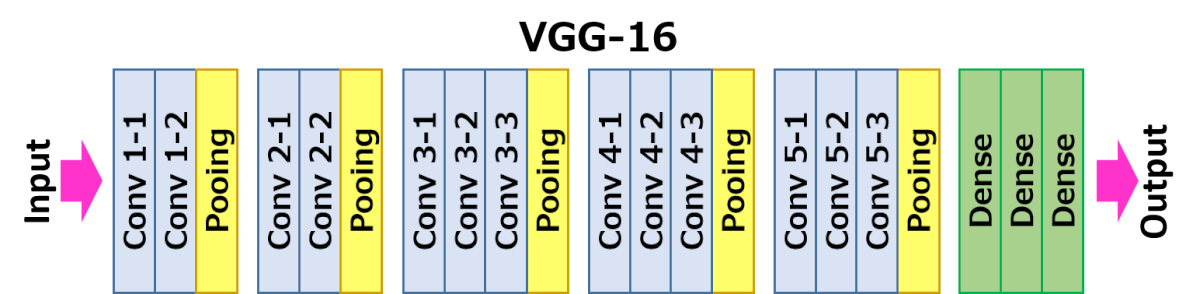 


### 👉 Description of Layers in CNN

### 👉 Convolutional layer: is feature extractor.
### 👉 Max Pooling : Extract the max pixels out from images which gives the max feature info.
### 👉 Average Pooling : Extract the average pixels out from images which gives the max feature info.
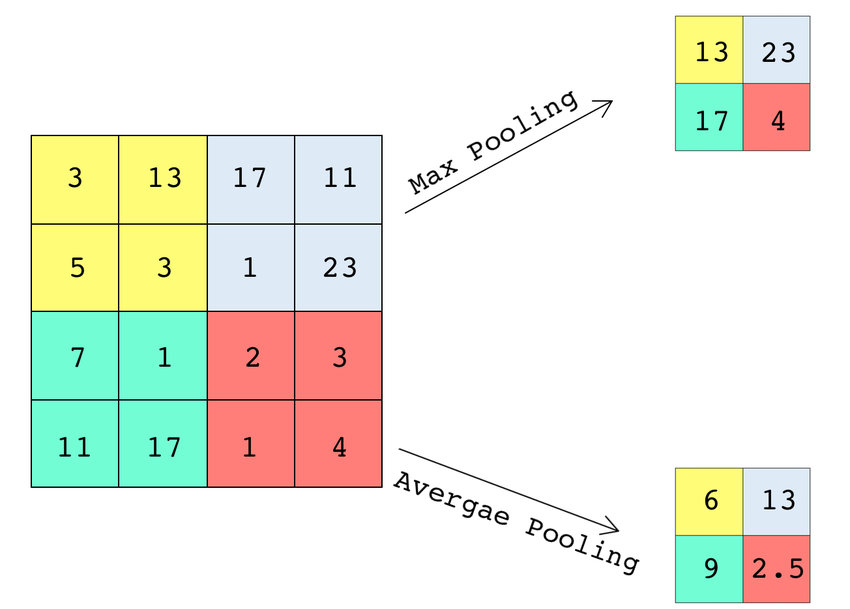

### 👉 Creating the VGG16 model
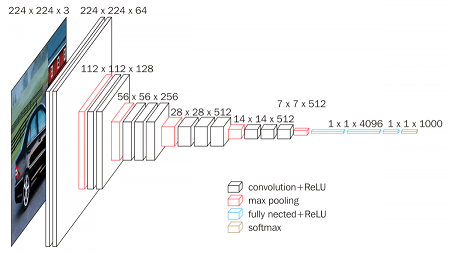

In [7]:
# input_shape(img_rows,img_cols,3) defining the input shape only one time 3- indicates colored images if its 1- then its grey images
# Batch Normalization we add this to model because our weights and bais will in almost same range not not vary much 
# Drop_out layer adding to avoid variance or overfitting in the model.

model = Sequential()

# 1 CONV-ReLU Layer
model.add(Conv2D(input_shape=(img_rows,img_cols,3),filters = 64,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 64,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2*2),strides=(2*2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 2 CONV-ReLU Layer
model.add(Conv2D(filters = 128,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 128,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2*2),strides=(2*2),padding='same'))
model.add(Dropout(0.5))

# 3 CONV-ReLU Layer
model.add(Conv2D(filters = 256,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 256,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 256,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2*2),strides=(2*2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 4 CONV-ReLU Layer
model.add(Conv2D(filters = 512,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 512,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 512,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2*2),strides=(2*2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 5 CONV-ReLU Layer
model.add(Conv2D(filters = 512,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 512,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(Conv2D(filters = 512,kernel_size=(3*3),padding ='same',activation= 'relu'))
model.add(MaxPool2D(pool_size=(2*2),strides=(2*2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Adding dense layer
model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))  #  units=4096 indcates dense fully connected layer after flattening       
model.add(Dense(units=4096,activation='relu'))  #  units=4096 indcates dense fully connected layer after flattening 
model.add(Dense(units=20,activation='softmax')) #  units=20 indicates the number of target classes and we use softmax activation for multiclass classification

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        15616     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        331840    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       663680    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)      

### 👉 Trainning the VGG16 model

In [6]:
import PIL.Image

In [7]:
#export CUDA_VISIBLE_DEVICES=1 

In [8]:
# While tranning model it takes much time in between suppose due to any reson laptop shuts down or anything happened so checkpoint will save the trainning of model till last it will upto trainned so when you tranning again it will not retrain that part again.

checkpoint = ModelCheckpoint(r'C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsonsTranningModel.h5',
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1
                             )

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3, # means if our validation accuray will not imporved after 3 epochs then it will stop tranning
                          verbose = 1,
                          restore_best_weights = True # restore the best weights
                          )

reduce_learningRate = ReduceLROnPlateau(monitor = 'val_loss', # if validation loss is not improving by the factor of 0.2 by 3 epochs then tranning stops
                              factor = 0.2,
                              patience = 3, # means if our validation accuray will not imporved after 3 epochs then it will stop tranning  
                              verbose = 1,
                              min_delta = 0.00001
                              )

callbacks = [earlystop,checkpoint, reduce_learningRate] # storing the callbacks into list

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001), # lr=0.001 learning rate
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 15


history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = val_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/15
38/38 [==============================] - 10615s 279s/step - loss: 2.8508 - accuracy: 0.1136 - val_loss: 3.0958 - val_accuracy: 0.0527

Epoch 00001: val_loss improved from inf to 3.09578, saving model to C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsonsTranningModel.h5
Epoch 2/15
38/38 [==============================] - 12240s 322s/step - loss: 2.7929 - accuracy: 0.1221 - val_loss: 3.0912 - val_accuracy: 0.0481

Epoch 00002: val_loss improved from 3.09578 to 3.09120, saving model to C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsonsTranningModel.h5
Epoch 3/15
38/38 [==============================] - 10498s 276s/step - loss: 2.7491 - accuracy: 0.1371 - val_loss: 3.1167 - val_accuracy: 0.0645

Epoch 00003: val_loss did not improve from 3.09120
Epoch 4/15
38/38 [==============================] - 9819s 258s/step - loss: 2.6974 - accuracy: 0.1479 - val_loss: 3.1889 - val_accuracy: 0.0356

Epoch 00004: val_loss did not improve from 3.09120
Epoch 5/15
38/38 [=============

In [9]:
from keras.models import load_model
classifier = load_model(r'C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsons_vgg16.h5')

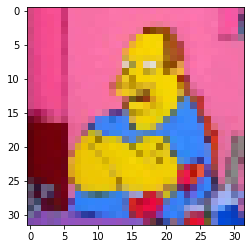

In [13]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

image = image.load_img(r'C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsons_dataset\validation\comic_book_guy\comic_book_guy_7.jpg',target_size = (32,32))
array_image =np.asarray(image) 
plt.imshow(array_image)
array_image = np.expand_dims(array_image,axis=0) # This function expands the array by inserting a new axis at the specified position. 

### 👉  Prediction 


In [14]:
output = classifier.predict_classes(array_image) # It will give the count of class which the image belong

# so get the name of all the classes to show the class name create the classes list
classes = r'C:\Users\Prachi\SIMPSONS_CHARACTER_RECOGNITION\simpsons_dataset\validation'
mydir = [d for d in os.listdir(classes) if os.path.isdir(os.path.join(classes, d))]
mydir

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

In [15]:
output[0]

14